<a href="https://colab.research.google.com/github/HARISHREDDYCHILUMULA/ML_Projects/blob/main/Detection%20of%20Horses%20and%20Persons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C1/W4/ungraded_labs/C1_W4_Lab_1_image_generator_no_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Humans and Horses using Convolutional Neural Networks

I have taken dataset from [Tensorflow.org](https://www.tensorflow.org/datasets/catalog/horses_or_humans) . This contains over a thousand images of horses and humans with varying poses and filesizes. [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class is used to prepare this dataset so it can be fed to a convolutional neural network.


Below code is to download the compressed dataset `horse-or-human.zip` which contains thousands of images of Horses and Humans.

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-03-18 05:30:49--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.8.128, 74.125.204.128, 64.233.187.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.8.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  29.1MB/s    in 5.7s    

2023-03-18 05:30:55 (25.1 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



Unzipping the archive using the [zipfile](https://docs.python.org/3/library/zipfile.html) module.

In [2]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')
zip_ref.close()

The contents of the .zip are extracted to the base directory `./horse-or-human`, which in turn each contain `horses` and `humans` subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like' and 'this is what a human looks like'.

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. You will use the ImageDataGenerator API instead -- and this is coded to automatically label images according to the directory names and structure. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. `ImageDataGenerator` will label the images appropriately for you, reducing a coding step. 

You can now define each of these directories:

The os.path.join() function in Python is used to join one or more path components intelligently. It is a platform-independent method of joining directory and file names in a way that is appropriate for the operating system. This means that it can be used on any operating system such as Windows, Linux, and macOS.

The function takes one or more path components as arguments and joins them using the appropriate separator for the operating system. For example, on Windows, the separator is the backslash (\), while on Unix-based systems, it is the forward slash (/).

In [3]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

Now see what the filenames look like in the `horses` and `humans` training directories:

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse04-4.png', 'horse27-1.png', 'horse08-5.png', 'horse42-0.png', 'horse28-7.png', 'horse40-9.png', 'horse05-2.png', 'horse08-8.png', 'horse37-9.png', 'horse18-1.png']
['human13-24.png', 'human10-26.png', 'human14-19.png', 'human09-13.png', 'human03-27.png', 'human10-19.png', 'human10-16.png', 'human09-14.png', 'human14-04.png', 'human07-01.png']


You can also find out the total number of horse and human images in the directories:

In [5]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


Now take a look at a few pictures to get a better sense of what they look like. First, configure the `matplotlib` parameters:

The %matplotlib inline magic command is used to display Matplotlib plots in the output cells of the Jupyter notebook or IPython console. This command tells the notebook to render any plots generated by Matplotlib directly in the output cells, rather than in separate windows or external files.

The import matplotlib.pyplot as plt statement imports the Pyplot module from the Matplotlib library, which provides a simple interface for creating plots and visualizations. 

The import matplotlib.image as mpimg statement imports the mpimg module from the Matplotlib library, which provides a way to load and display image files within a plot.

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

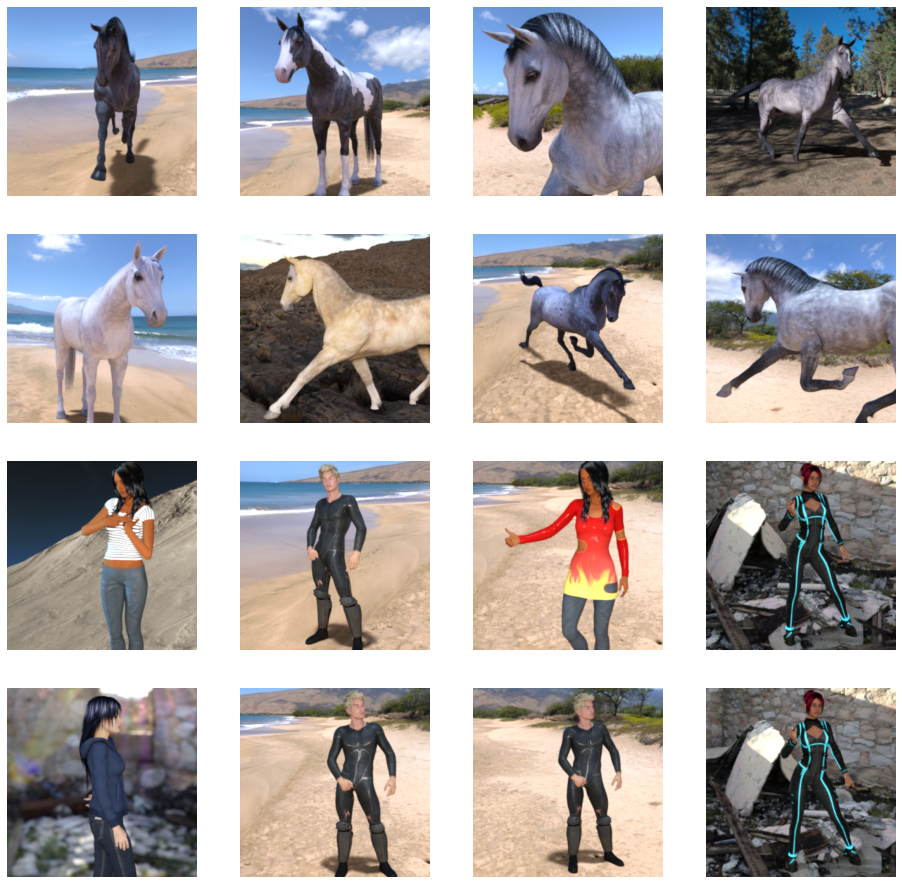

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Building a Small Model from Scratch

Now you can define the model architecture that you will train.

Step 1 will be to import tensorflow.

# Convolutional Neural Network

Convolutional Neural Network is a type of neural network commonly used for image classification, object detection, and other computer vision tasks.

CNNs are designed to automatically and adaptively learn spatial hierarchies of features from input data, such as images. They consist of multiple layers of interconnected neurons that learn to recognize and extract increasingly complex features from the input image. These layers typically include convolutional layers, pooling layers, and fully connected layers.

Convolutional layers are the key component of CNNs, and they consist of a set of filters or kernels that are convolved with the input image to produce a set of feature maps. The filters are learned during training, and they are designed to recognize specific patterns or features in the input image.

Pooling layers are used to downsample the feature maps produced by the convolutional layers, which reduces the spatial dimensionality of the data and helps to reduce overfitting. There are several types of pooling layers, such as max pooling and average pooling.

Fully connected layers are used at the end of the CNN to classify the input image into one of several categories. These layers are similar to the ones used in traditional neural networks, and they consist of multiple neurons that are fully connected to the output of the previous layer.

**TensorFlow**

TensorFlow is an open-source machine learning framework developed by Google Brain team for building and training various types of machine learning models, including neural networks. It is one of the most widely used machine learning frameworks, along with PyTorch and Keras.

TensorFlow provides a flexible platform for building and deploying machine learning models at scale. It allows developers to build models using a high-level API (such as Keras) or by writing low-level code using its core APIs. TensorFlow also provides tools for data preprocessing, model training, and model evaluation, as well as support for distributed training across multiple devices and machines.

One of the key features of TensorFlow is its ability to build and train deep neural networks, including convolutional neural networks (CNNs) and recurrent neural networks (RNNs). TensorFlow also includes a variety of pre-built models, such as object detection models, image classification models, and natural language processing models, which can be easily fine-tuned for specific use cases.

In [8]:
import tensorflow as tf

**Conv2D**

Conv2D layer is used to apply convolutional operations on 2D image data. It consists of a set of filters that are convolved with the input image to produce a set of feature maps. Each filter learns to detect a specific pattern or feature in the input image. During training, the weights of these filters are learned through backpropagation.

**MaxPooling**

MaxPooling2D layer is used to downsample the feature maps produced by the Conv2D layer. It reduces the spatial size of the feature maps while retaining the most important features. MaxPooling2D operates on each feature map independently and applies a max operation to each non-overlapping window of a specified size.

**Flatten**

 The Flatten layer reshapes this tensor into a 1D vector, which can then be fed into the fully connected layers for classification or regression.

**Dense Layer**

Dense layer is a fully connected layer in which every neuron in the layer is connected to every neuron in the previous layer. This means that each neuron in the Dense layer receives input from all the neurons in the previous layer and computes a weighted sum of the inputs, followed by an activation function.

**Activation Function**

An activation function is a mathematical function that is applied to the output of a neuron in a neural network. It introduces non-linearity to the output of the neuron, allowing the neural network to learn complex patterns in the input data.

**ReLU** (Rectified Linear Unit): The ReLU function returns 0 for negative inputs and the input value for positive inputs. It is the most commonly used activation function in neural networks due to its simplicity and effectiveness in preventing the vanishing gradient problem.

**Sigmoid**: The sigmoid function maps any real-valued number to a value between 0 and 1. It is commonly used in the output layer of a binary classification problem.

In [9]:
model = tf.keras.models.Sequential([
    # The input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution with 16 filters of size 3*3
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution with 32 filters of size 3*3
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution with 64 filters of size 3*3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution with 64 filters of size 3*3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution with 64 filters of size 3*3
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

You can review the network architecture and the output shapes with `model.summary()`.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

Train the model with the `binary_crossentropy` loss because it's a binary classification problem, and the final activation is a sigmoid. 

In this case, using the `RMSprop optimization algorithm` is preferable to stochastic gradient descent, because RMSprop automates learning-rate tuning for us.

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Preprocessing

Next step is to set up the data generators that will read pictures in the source folders, convert them to `float32` tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary).

Data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, we'll will preprocess the images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras, this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`.

**Image Data Generator**

The ImageDataGenerator class in TensorFlow is a powerful tool for creating data augmentation pipelines for image data. It allows you to generate augmented images on-the-fly during model training, which can help improve the accuracy and robustness of your models by exposing them to a wider range of input variations.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        class_mode='binary') #class_mode specifies the type of label array that is returned by the generator.


Found 1027 images belonging to 2 classes.


### Training

Let's train the model for 15 epochs.

The `loss` and `accuracy` are great indicators of progress in training. `loss` measures the current model prediction against the known labels, calculating the result. `accuracy`, on the other hand, is the portion of correct guesses. 

**Epoch** refers to one complete pass through the entire training dataset during model training.
**verbose** parameter is used in the model.fit() method to control the amount of logging output that is displayed during model training.
verbose can take one of three possible values:

0: No logging output is displayed during training.

1: A progress bar is displayed during training that shows the number of epochs completed, the time elapsed, and the training and validation loss and accuracy.

2: A progress bar is not displayed, but the training and validation loss and accuracy are printed to the console after each epoch.

In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 101s 14s/step - loss: 0.6694 - accuracy: 0.5417
Epoch 2/15
8/8 [==============================] - 100s 12s/step - loss: 0.5594 - accuracy: 0.7097
Epoch 3/15
8/8 [==============================] - 99s 12s/step - loss: 0.5047 - accuracy: 0.7742
Epoch 4/15
8/8 [==============================] - 99s 12s/step - loss: 1.2163 - accuracy: 0.7653
Epoch 5/15
8/8 [==============================] - 100s 12s/step - loss: 0.3216 - accuracy: 0.8832
Epoch 6/15
8/8 [==============================] - 99s 12s/step - loss: 0.1761 - accuracy: 0.9310
Epoch 7/15
8/8 [==============================] - 101s 12s/step - loss: 0.1837 - accuracy: 0.9199
Epoch 8/15
8/8 [==============================] - 99s 12s/step - loss: 0.2290 - accuracy: 0.9188
Epoch 9/15
8/8 [==============================] - 101s 12s/step - loss: 0.1033 - accuracy: 0.9633
Epoch 10/15
8/8 [==============================] - 100s 12s/step - loss: 0.4474 - accuracy: 0.8888
Epoch 11/15
8/8 [======

### Model Prediction

Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a horse or a human.



In [16]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving Horse.jpg to Horse.jpg
1/1 [==============================] - 0s 179ms/step
[0.4549328]
Horse.jpg is a horse


## Clean Up

To terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)